<a href="https://colab.research.google.com/github/hpoymi/hpoymi/blob/main/Klasyfikacja_obiekt%C3%B3w_(Projekt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras import optimizers
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
num_classes = 3

img_width, img_height = 128, 128

In [8]:
import cv2
import os

for i in ["car","cat","bird"]:
  for file in os.listdir("/content/sample_data/train/"+i):
      if not file.startswith('.'):
          img = cv2.imread('/content/sample_data/train/'+i+'/' + '/' + file)
          img = cv2.resize(img, (img_width, img_height))
          cv2.imwrite('/content/sample_data/train/'+i+'/' + '/' + file, img)

for i in ["car","cat","bird"]:
  for file in os.listdir('/content/sample_data/test/'+i+'/'):
      if not file.startswith('.'):
          img = cv2.imread('/content/sample_data/test/'+i+'/' + '/' + file)
          img = cv2.resize(img, (img_width, img_height))
          cv2.imwrite('/content/sample_data/test/'+i+'/' + '/' + file, img)

In [77]:
from keras.models import load_model
model2 = load_model('/content/drive/MyDrive/model_saved1.h5')


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [10]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'], run_eagerly=True)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                        

In [11]:
train_datagen = ImageDataGenerator(
    zca_epsilon=1e-06,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255,
)

In [12]:
test_datagen = ImageDataGenerator(
    zca_epsilon=1e-06,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255,
    )

In [13]:
from keras.utils import to_categorical

training_set = train_datagen.flow_from_directory('/content/sample_data/train/',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 3,
                                                 class_mode = 'categorical',
                                                 classes = ["car","cat","bird"])

test_set = test_datagen.flow_from_directory('/content/sample_data/test/',
                                            target_size = (img_width, img_height),
                                            batch_size = 2,
                                            class_mode = 'categorical',
                                            classes = ["car","cat","bird",])


Found 30 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [121]:
len(test_set)

13

In [14]:
train_targets = to_categorical(training_set.classes, num_classes=num_classes)
test_targets = to_categorical(test_set.classes, num_classes=num_classes)

In [15]:
num_training_samples = len(training_set.classes)

num_validation_samples = len(test_set.classes)

In [146]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,
                                               verbose=0, mode='auto', baseline=None, restore_best_weights=True)

checkpoint = keras.callbacks.ModelCheckpoint('model1.h5', monitor='val_loss',
                                             verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks = [early_stopping, checkpoint]

In [149]:
history = model.fit(training_set, 
                    epochs=100, 
                    steps_per_epoch=10,
                    validation_steps=10,
                    validation_data=test_set, 
                    callbacks=callbacks
                    )

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 1.2115 - accuracy: 0.3333 - val_loss: 1.0553 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 1.1444 - accuracy: 0.3667 - val_loss: 1.1122 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 1.1884 - accuracy: 0.2667 - val_loss: 1.1025 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 1.1453 - accuracy: 0.2333 - val_loss: 1.0973 - val_accuracy: 0.3000
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: 1.0734 - accuracy: 0.5667 - val_loss: 1.0361 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 1.0427 - accuracy: 0.5000 - val_loss: 1.0674 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 1.0220 - accuracy: 0.4000 - val_loss: 1.0034 - val_accuracy: 0.5000
Epoch 8/100
1

In [55]:
model.save('/content/drive/MyDrive/model_saved1.h5')

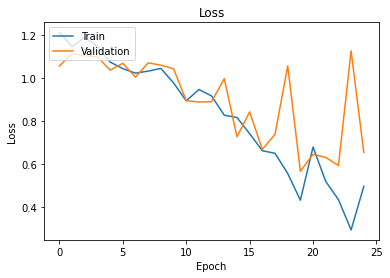

In [150]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

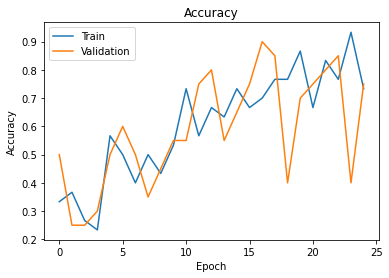

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_true))




10/10 [==============================] - 1s 93ms/step


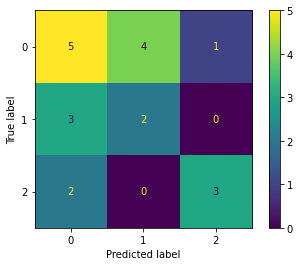

In [153]:
disp.plot()

In [131]:
from keras.preprocessing import image
from PIL import Image

In [155]:
class_names = ["samochod", "kot", "ptak"]

for i in range(1,11):
  img_path = '/content/sample_data/check/'+str(i)+'.jpg'
  img = Image.open(img_path)

  img = img.resize((128,128))

  img = np.array(img)

  img = np.expand_dims(img, axis=0)
  img = img / 255.

  predictions = model.predict(img)

  pclass = np.argmax(predictions)
  class_prob = predictions[0, pclass]
  class_names = ["samochod", "kot", "ptak"]
  print("Predykowana clasa:", pclass)
  print("Na zdjęciu jest " + class_names[pclass] + " z wiarygodnością " + str(round(class_prob*100,1))+' %')

1/1 [==============================] - 0s 90ms/step
Predykowana clasa: 1
Na zdjęciu jest kot z wiarygodnością 57.2 %
1/1 [==============================] - 0s 64ms/step
Predykowana clasa: 2
Na zdjęciu jest ptak z wiarygodnością 35.9 %
1/1 [==============================] - 0s 72ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 80.2 %
1/1 [==============================] - 0s 75ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 70.7 %
1/1 [==============================] - 0s 65ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 61.4 %
1/1 [==============================] - 0s 70ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 89.5 %
1/1 [==============================] - 0s 73ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 71.2 %
1/1 [==============================] - 0s 66ms/step
Predykowana clasa: 0
Na zdjęciu jest samochod z wiarygodnością 78.1 %
1/1 [============================

macierz pomylek,
porownywania z gotowcem,
zbior Pana do testu,
eksperyment


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.utils import plot_model

In [3]:
for i in range(1,11):
  obraz = np.expand_dims(
      image.img_to_array(
          image.load_img('/content/sample_data/check/'+str(i)+'.jpg', target_size=(224,224,3))
          ), axis=0
      )

  nn = tf.keras.applications.vgg16.VGG16(weights='imagenet')
  y_pred = nn.predict(obraz)
  print(tf.keras.applications.vgg16.decode_predictions(y_pred, top=5))

1/1 [==============================] - 1s 822ms/step
[[('n04037443', 'racer', 0.49642152), ('n03444034', 'go-kart', 0.16494311), ('n04285008', 'sports_car', 0.10383246), ('n03100240', 'convertible', 0.04443416), ('n02930766', 'cab', 0.02793459)]]
1/1 [==============================] - 1s 685ms/step
[[('n04252225', 'snowplow', 0.89697176), ('n02704792', 'amphibian', 0.03565987), ('n04037443', 'racer', 0.020738952), ('n02930766', 'cab', 0.016751278), ('n03444034', 'go-kart', 0.0077700866)]]
1/1 [==============================] - 1s 685ms/step
[[('n03100240', 'convertible', 0.64994556), ('n03445924', 'golfcart', 0.11043559), ('n02814533', 'beach_wagon', 0.038358327), ('n03670208', 'limousine', 0.036174245), ('n03899768', 'patio', 0.030441787)]]
1/1 [==============================] - 1s 1s/step
[[('n03770679', 'minivan', 0.43051335), ('n03769881', 'minibus', 0.26454243), ('n03977966', 'police_van', 0.12704173), ('n03930630', 'pickup', 0.08115084), ('n02814533', 'beach_wagon', 0.04231577)]]

1/1 [==============================] - 1s 1s/step
[[('n04037443', 'racer', 0.19914038), ('n03770679', 'minivan', 0.13649608), ('n04285008', 'sports_car', 0.13108836), ('n03100240', 'convertible', 0.08884519), ('n03670208', 'limousine', 0.05836331)]]


1/1 [==============================] - 1s 1s/step
[[('n03770679', 'minivan', 0.5997627), ('n03670208', 'limousine', 0.17320639), ('n03977966', 'police_van', 0.06604922), ('n02930766', 'cab', 0.039924372), ('n02814533', 'beach_wagon', 0.038771126)]]
1/1 [==============================] - 1s 663ms/step
[[('n03770679', 'minivan', 0.3074539), ('n03670208', 'limousine', 0.26382303), ('n02814533', 'beach_wagon', 0.101109736), ('n03977966', 'police_van', 0.09421085), ('n02930766', 'cab', 0.053050745)]]
1/1 [==============================] - 1s 672ms/step
[[('n02930766', 'cab', 0.24482325), ('n04252225', 'snowplow', 0.16525318), ('n03770679', 'minivan', 0.08969523), ('n02965783', 'car_mirror', 0.055774093), ('n02701002', 'ambulance', 0.04998132)]]
1/1 [==============================] - 1s 716ms/step
[[('n04285008', 'sports_car', 0.3125191), ('n03670208', 'limousine', 0.31061003), ('n04037443', 'racer', 0.24368207), ('n03100240', 'convertible', 0.04289066), ('n02814533', 'beach_wagon', 0.037113